## Statements:
>pd.DataFrame(rawcoursedata[['avg_rating','num_lectures','content_length_min','price']])

Will the course duration and content length affect the rating? e.g. longer course better rating because covers more info

Will longer course requires more money?


# Import Essential Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Data Preparation

In [2]:
# Import the dataset -  Udemy Courses
rawcoursedata = pd.read_csv('Course_info.csv')
rawcoursedata.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [18]:
rawcoursedata.corr()

,id,is_paid,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
id,1.000000,0.002794,-0.006701,-0.147775,-0.256726,-0.105234,-0.133923,-0.116034,-0.049740
is_paid,0.002794,1.000000,0.236707,-0.087247,-0.089873,-0.008471,-0.012674,0.132016,0.130122
price,-0.006701,0.236707,1.000000,0.017964,0.031457,0.032550,0.039304,0.150983,0.154961
num_subscribers,-0.147775,-0.087247,0.017964,1.000000,0.077144,0.736819,0.730623,0.180190,0.119574
avg_rating,-0.256726,-0.089873,0.031457,0.077144,1.000000,0.048506,0.060731,0.146017,0.108175
num_reviews,-0.105234,-0.008471,0.032550,0.736819,0.048506,1.000000,0.951832,0.186023,0.125941
num_comments,-0.133923,-0.012674,0.039304,0.730623,0.060731,0.951832,1.000000,0.202704,0.137998
num_lectures,-0.116034,0.132016,0.150983,0.180190,0.146017,0.186023,0.202704,1.000000,0.729714
content_length_min,-0.049740,0.130122,0.154961,0.119574,0.108175,0.125941,0.137998,0.729714,1.000000


# Clean Data
### 1. Standardise the Variable Names

In [15]:
#select equired columns
ratingNumberLength_raw = pd.DataFrame(rawcoursedata[['avg_rating','num_lectures','content_length_min','price']])

# Get the data types and data dimensions:
print("Data type : ", type(ratingNumberLength_raw))
print(ratingNumberLength_raw.dtypes)
print("Data dims : ", ratingNumberLength_raw.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
avg_rating            float64
num_lectures          float64
content_length_min    float64
price                 float64
dtype: object
Data dims :  (209734, 4)


In [16]:
# Convert all Variable Names to UPPERCASE
ratingNumberLength_raw.columns = ratingNumberLength_raw.columns.str.upper()

# Print the Variable Information to check
ratingNumberLength_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   AVG_RATING          209734 non-null  float64
 1   NUM_LECTURES        209734 non-null  float64
 2   CONTENT_LENGTH_MIN  209734 non-null  float64
 3   PRICE               209734 non-null  float64
dtypes: float64(4)
memory usage: 6.4 MB


### 2.Remove outliers

<class 'str'>, AVG_RATING => 3.8, 4.625
[AVG_RATING] total outliers: 29601
<class 'str'>, NUM_LECTURES => 11.0, 42.0
[NUM_LECTURES] total outliers: 16890
<class 'str'>, CONTENT_LENGTH_MIN => 69.0, 289.0
[CONTENT_LENGTH_MIN] total outliers: 19173
<class 'str'>, PRICE => 19.99, 99.99
[PRICE] total outliers: 11404


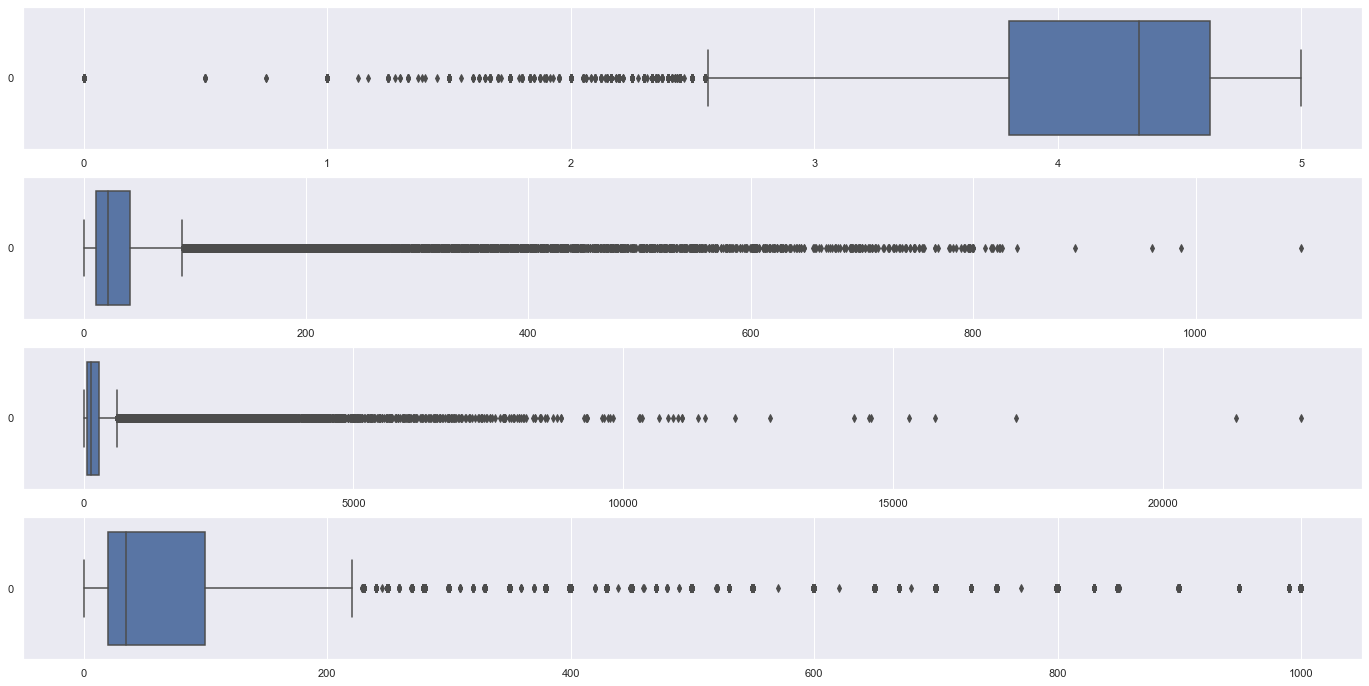

In [19]:
f, axes = plt.subplots(4, 1, figsize=(24, 12))
# Draw the Boxplots 
sb.boxplot(data = ratingNumberLength_raw.AVG_RATING, orient = "h", ax = axes[0])
sb.boxplot(data = ratingNumberLength_raw.NUM_LECTURES, orient = "h", ax = axes[1])
sb.boxplot(data = ratingNumberLength_raw.CONTENT_LENGTH_MIN, orient = "h", ax = axes[2])
sb.boxplot(data = ratingNumberLength_raw.PRICE, orient = "h", ax = axes[3])

# Calculate the quartiles and Count the number of outliers
for column in ratingNumberLength_raw.columns:
    column_data: pd.DataFrame = ratingNumberLength_raw[column]
    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)
    interquartile_range = q3-q1

    print(f"{type(column)}, {column} => {q1}, {q3}")

    lower_whisker = q1-1.5*interquartile_range
    upper_whisker = q3+1.5*interquartile_range

    outliers = sum( (column_data < lower_whisker) | (column_data > upper_whisker) )
    print(f"[{column}] total outliers: { outliers }")


#### To remove

In [20]:
q1 = ratingNumberLength_raw.quantile(0.25)
q3 = ratingNumberLength_raw.quantile(0.75)
interquartile_range = q3-q1

lower_whisker = q1-1.5*interquartile_range
upper_whisker = q3+1.5*interquartile_range

outliers = ((ratingNumberLength_raw < lower_whisker) | (ratingNumberLength_raw > upper_whisker)).any(axis=1)
ratingNumberLength_cleanup: pd.DataFrame = ratingNumberLength_raw[~outliers]
print(f"Union outliers: {sum(outliers)}")
ratingNumberLength_cleanup.head

Union outliers: 60770


<bound method NDFrame.head of         AVG_RATING  NUM_LECTURES  CONTENT_LENGTH_MIN   PRICE
1         4.500000           9.0                88.0    0.00
2         4.400000          14.0                82.0   19.99
4         4.750000          38.0               569.0  159.99
6         3.850000           8.0                80.0   39.99
7         4.000000          56.0               363.0   74.99
...            ...           ...                 ...     ...
209706    5.000000          11.0                68.0   24.99
209711    4.650000          56.0               275.0   34.99
209719    4.214286          37.0               397.0   84.99
209723    5.000000          10.0                44.0   19.99
209725    5.000000           5.0                32.0   69.99

[148964 rows x 4 columns]>

In [21]:
ratingNumberLength_cleanup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148964 entries, 1 to 209725
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   AVG_RATING          148964 non-null  float64
 1   NUM_LECTURES        148964 non-null  float64
 2   CONTENT_LENGTH_MIN  148964 non-null  float64
 3   PRICE               148964 non-null  float64
dtypes: float64(4)
memory usage: 5.7 MB


In [22]:
ratingNumberLength_raw.describe()

,AVG_RATING,NUM_LECTURES,CONTENT_LENGTH_MIN,PRICE
count,209734.000000,209734.000000,209734.000000,209734.000000
mean,3.747179,36.548395,265.558856,81.665529
std,1.533711,51.871962,454.448676,117.317846
min,0.000000,0.000000,0.000000,0.000000
25%,3.800000,11.000000,69.000000,19.990000
50%,4.333334,22.000000,133.000000,34.990000
75%,4.625000,42.000000,289.000000,99.990000
max,5.000000,1095.000000,22570.000000,999.990000


In [23]:
ratingNumberLength_cleanup.describe()

,AVG_RATING,NUM_LECTURES,CONTENT_LENGTH_MIN,PRICE
count,148964.000000,148964.000000,148964.000000,148964.000000
mean,4.321367,25.210608,161.090445,57.700246
std,0.474289,18.684809,130.608495,60.266377
min,2.562500,0.000000,0.000000,0.000000
25%,4.050000,11.000000,66.000000,19.990000
50%,4.400000,20.000000,118.000000,29.990000
75%,4.650000,35.000000,221.000000,84.990000
max,5.000000,88.000000,619.000000,219.990000


# Exploratory Data Analysis / Visualization

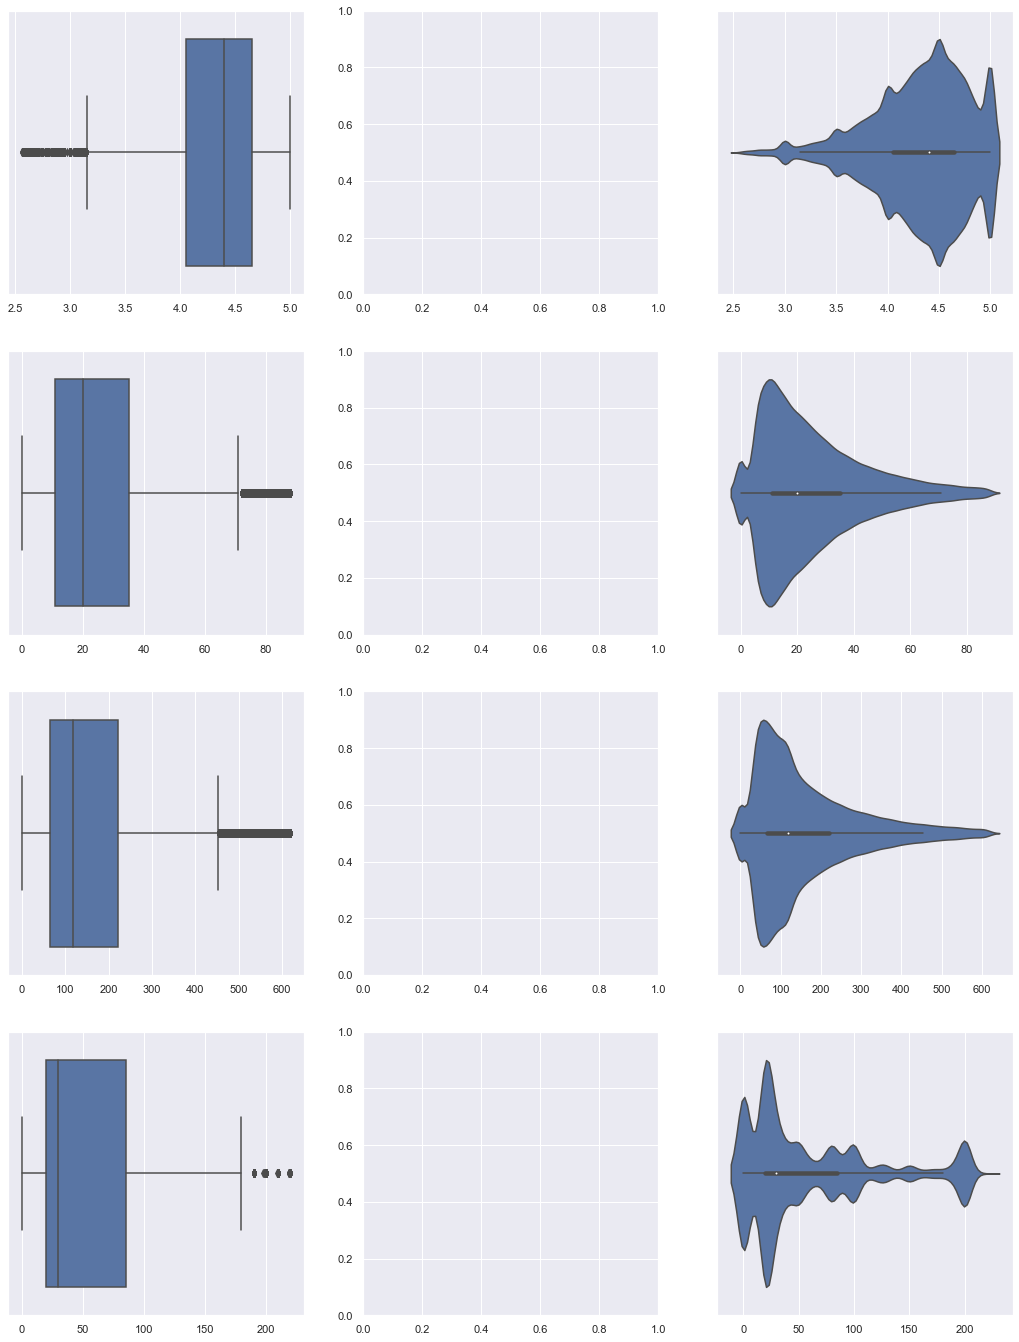

In [25]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 4, figsize=(18, 24))

count = 0
for var in ratingNumberLength_cleanup:
    sb.boxplot(x=[var], data=ratingNumberLength_cleanup, orient = "h", ax = axes[count,0])
    #sb.histplot(x=[var], data=ratingNumberLength_cleanup, ax = axes[count,1])
    sb.violinplot(x=[var], data=ratingNumberLength_cleanup, orient = "h", ax = axes[count,2])
    count += 1

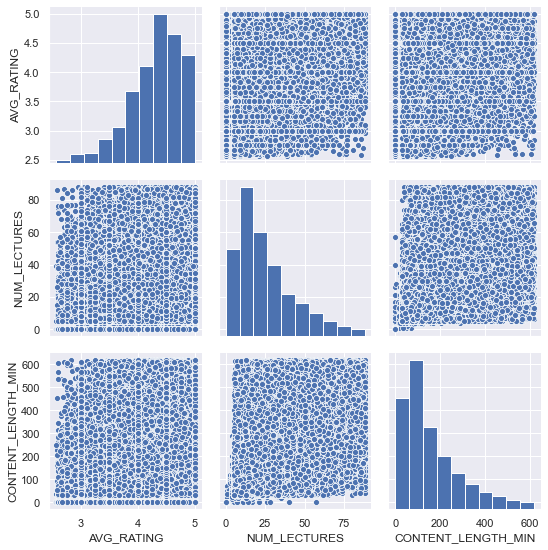

In [14]:
# Draw pairs of variables against one another
sb.pairplot(data = ratingNumberLength_cleanup)

                    AVG_RATING  NUM_LECTURES  CONTENT_LENGTH_MIN     PRICE
AVG_RATING            1.000000      0.065172            0.091653  0.002792
NUM_LECTURES          0.065172      1.000000            0.649300  0.262430
CONTENT_LENGTH_MIN    0.091653      0.649300            1.000000  0.266653
PRICE                 0.002792      0.262430            0.266653  1.000000


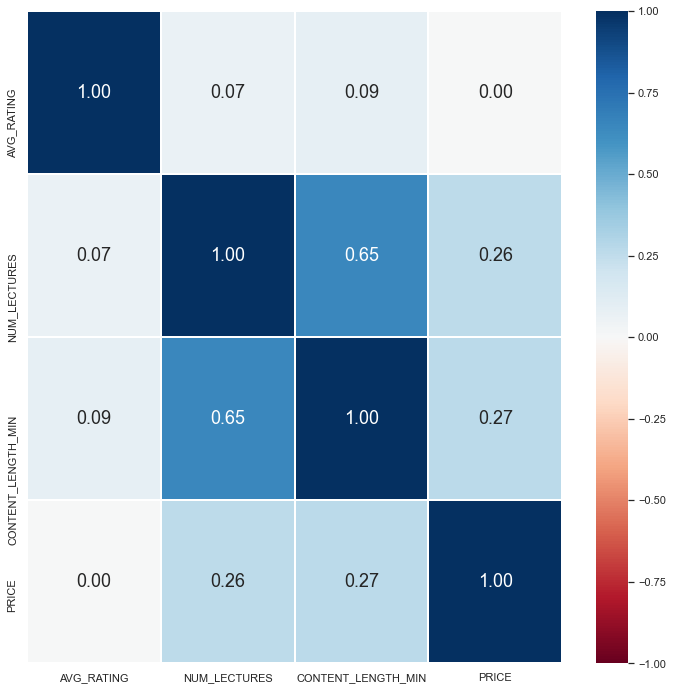

In [26]:
# Correlation Matrix
print(ratingNumberLength_cleanup.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(ratingNumberLength_cleanup.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")



# Observtion

#### There is not a strong relationship between avg_rating and num_lectures,content_length_min

####  However, the number of lecture and content length surprisingly has 0.6 of the relationship. This means although course is having more lectures, the length of lectures could be still long. The heatmap also tells not long lecture will have expensive price

#### It also shows that the average rating totally has no relationship with the price which is quite surprise 